# Abalone Age Prediction

In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from helper_functions import plot_pred

## Data loading

In [68]:
file_path = './data/abalone.csv'
df = pd.read_csv(file_path)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [69]:
df['Age'] = df['Rings'] + 1.5

df = df.drop(['Rings'], axis=1)

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Data exploration

### Data Analysis

In [70]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [72]:
# Get the shape of the data
df.shape

(4177, 9)

In [73]:
# Get the column names
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [74]:
# Count missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [75]:
# Select duplicated rows
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age


Seems like there is no duplicated data

In [76]:
# Select categorical data, numerical data
categorical_data = df.select_dtypes(['object'])
numerical_data = df.select_dtypes(['float64', 'int64'])

categorical_data.head(), numerical_data.head()

(  Sex
 0   M
 1   M
 2   F
 3   M
 4   I,
    Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
 0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
 1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
 2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
 3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
 4   0.330     0.255   0.080        0.2050          0.0895          0.0395   
 
    Shell weight   Age  
 0         0.150  16.5  
 1         0.070   8.5  
 2         0.210  10.5  
 3         0.155  11.5  
 4         0.055   8.5  )

In [77]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

### Data visualization

(np.float64(1.0999999999999999),
 np.float64(31.9),
 np.float64(0.0),
 np.float64(1730.4))

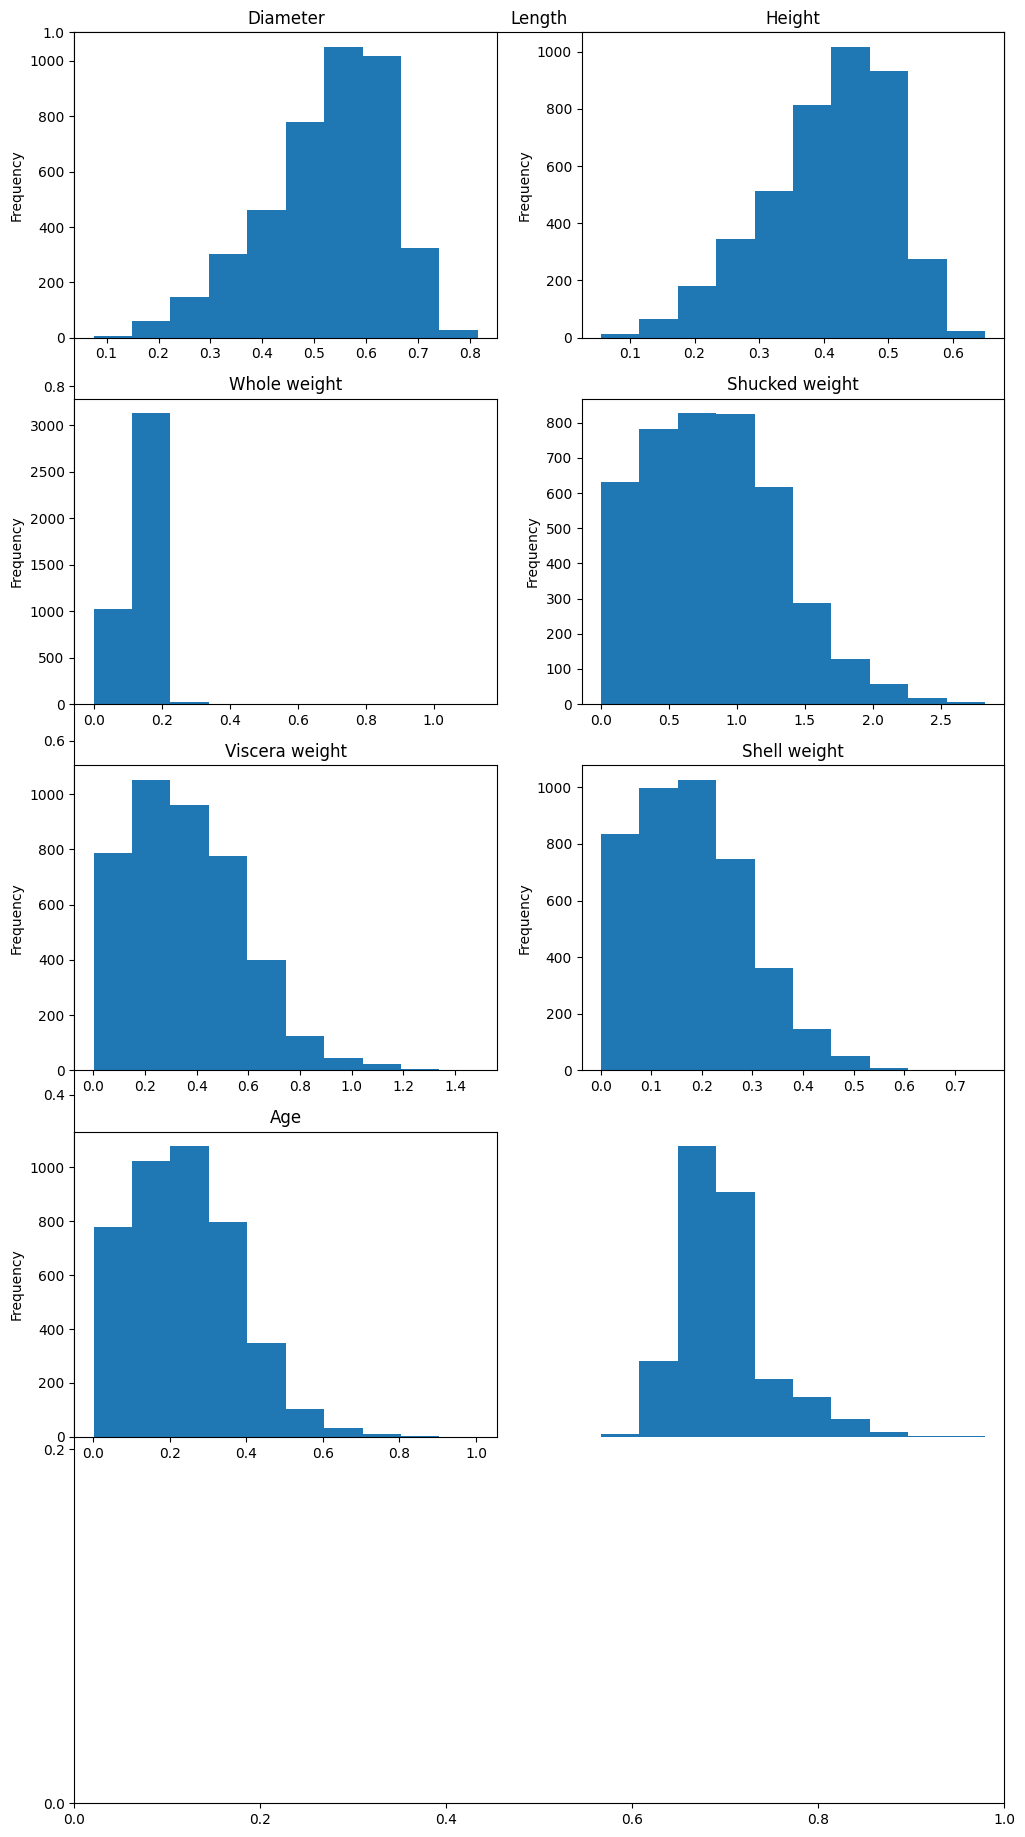

In [78]:
# Plot age
plt.figure(figsize=(12, 23))
for i, col in enumerate(numerical_data):
  plt.title(col, fontsize=12)
  ax = plt.subplot(5, 2, i+1)
  if col == 'Sex':
    df[col].value_counts().plot.bar()
  else:
    df[col].plot.hist()
plt.axis(False)

{'whiskers': [<matplotlib.lines.Line2D at 0x13488cad0>,
 'caps': [<matplotlib.lines.Line2D at 0x13488dc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x13485be50>],
 'medians': [<matplotlib.lines.Line2D at 0x13488ed90>],
 'fliers': [<matplotlib.lines.Line2D at 0x13488f6d0>],
 'means': []}

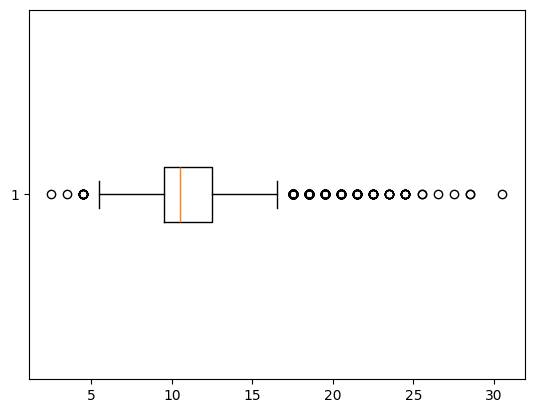

In [79]:
plt.boxplot(df['Age'], vert=False)

## Data preprocessing

### Feature Correlation

In [80]:
pearson_corr = df.corr('pearson', numeric_only=True)
pearson_corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<Axes: >

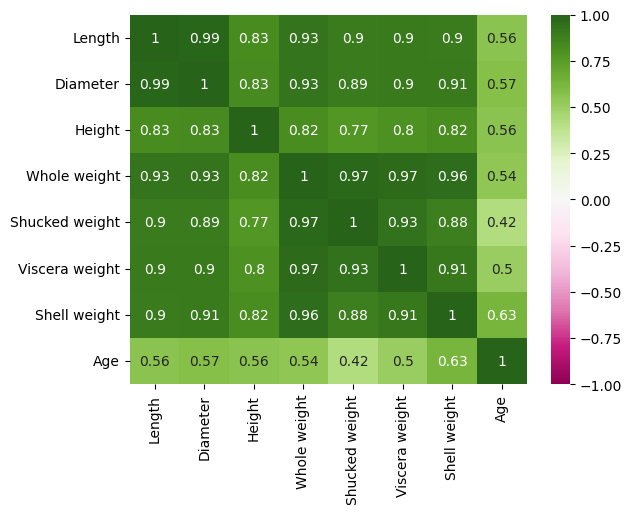

In [81]:
sns.heatmap(pearson_corr, cmap='PiYG', annot=True, vmax=1, vmin=-1)

### Remove outliers

In [82]:
def remove_outliers(df: pd.DataFrame):
  numerical_df = df.select_dtypes(include=np.number)
  Q1 = numerical_df.quantile(0.25)
  Q3 = numerical_df.quantile(0.75)
  IQR = Q3 - Q1
  
  outlier = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)
  return df[~outlier]

df = remove_outliers(df)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


{'whiskers': [<matplotlib.lines.Line2D at 0x134a1a990>,
 'caps': [<matplotlib.lines.Line2D at 0x134a27a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x134a25ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x134a34b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x134a35390>],
 'means': []}

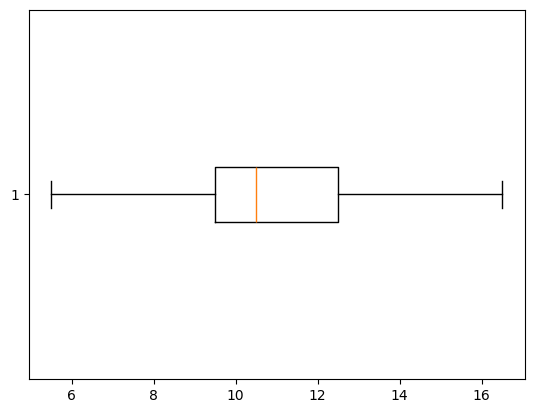

In [83]:
plt.boxplot(df['Age'], vert=False)

### Data Encoding

In [84]:
df['Sex'].head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [85]:
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1, 'I': 2})

df.head()

/var/folders/6p/rzcxcc9s58v5jv0m1clm5r180000gn/T/ipykernel_20544/1718764929.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1, 'I': 2})


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [86]:
df.shape

(3781, 9)

In [87]:
numerical_data.shape

(4177, 8)

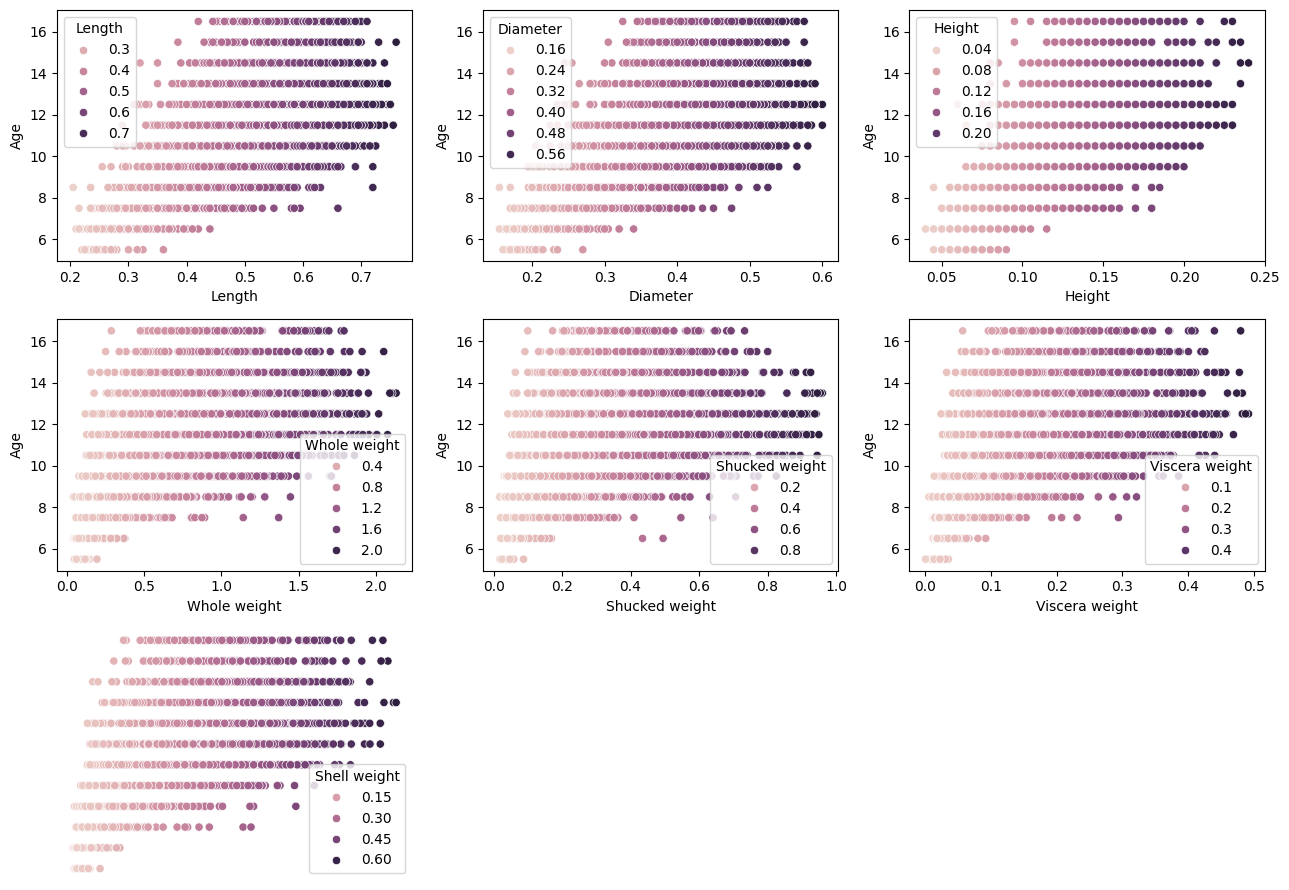

In [88]:
plt.figure(figsize=(13, 9))

target='Age'

for i, col in enumerate(numerical_data):
  if(col != target):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(df, x=col, y=target, hue=col)
    

plt.axis("off")
plt.tight_layout()

### Define feature and Target

In [89]:
X = df.drop(columns=target) # Features
y = df[target] # Target value

X[:5], y[:5]

(   Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
 0    0   0.455     0.365   0.095        0.5140          0.2245   
 1    0   0.350     0.265   0.090        0.2255          0.0995   
 2    1   0.530     0.420   0.135        0.6770          0.2565   
 3    0   0.440     0.365   0.125        0.5160          0.2155   
 4    2   0.330     0.255   0.080        0.2050          0.0895   
 
    Viscera weight  Shell weight  
 0          0.1010         0.150  
 1          0.0485         0.070  
 2          0.1415         0.210  
 3          0.1140         0.155  
 4          0.0395         0.055  ,
 0    16.5
 1     8.5
 2    10.5
 3    11.5
 4     8.5
 Name: Age, dtype: float64)

### Feature Scaling

#### Standardization

In [90]:
std_scaler = StandardScaler()

# scaled_data
X_scaled = std_scaler.fit_transform(X)

columns_header = df.drop(columns=[target]).columns

X_scaled = pd.DataFrame(data=X_scaled, columns=columns_header)

X_scaled[:5]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-1.170205,-0.592283,-0.433414,-1.199002,-0.625502,-0.604416,-0.719291,-0.619496
1,-1.170205,-1.533969,-1.517342,-1.340646,-1.274339,-1.218729,-1.237502,-1.270924
2,0.031464,0.080351,0.162747,-0.065858,-0.258914,-0.447151,-0.319528,-0.130926
3,-1.170205,-0.726809,-0.433414,-0.349144,-0.621004,-0.648646,-0.590972,-0.578782
4,1.233132,-1.713338,-1.625735,-1.623932,-1.320443,-1.267874,-1.326338,-1.393066


### Splitting data

In [91]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.25)

X_train, y_train = X_train.astype('float32'), y_train.astype('float32')
X_test, y_test = X_test.astype('float32'), y_test.astype('float32')


len(X_train), len(X_test)

(2835, 946)

In [92]:
X_train[:5]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
905,1.233132,-1.220074,-1.246360,-1.623932,-1.222612,-1.108153,-1.227631,-1.311638
631,1.233132,-2.744709,-2.709664,-2.190504,-1.663416,-1.604518,-1.553364,-1.718780
1859,-1.170205,0.125193,0.162747,-0.349144,-0.121725,0.036928,0.154264,-0.379283
3071,1.233132,-2.430814,-2.438682,-2.048861,-1.600444,-1.538172,-1.533622,-1.665851
3008,0.031464,-0.099018,-0.270824,-0.207501,-0.468072,-0.606873,-0.378752,-0.334497


In [93]:
y_train[:5]

1071     8.5
784      6.5
2064     9.5
3428     5.5
3351    14.5
Name: Age, dtype: float32

## Model Definition

#### Linear Regression

#### Defining the model

In [94]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

#### Fitting data

In [95]:
linear_regression.fit(X_train, y_train)

LinearRegression()

#### Making predictions on train

In [96]:
y_pred = linear_regression.predict(X_train)

#### Evaluating the model on train

In [97]:
r_squared_score = r2_score(y_train, y_pred)
mse_score = mean_squared_error(y_train, y_pred)
rmse_score = np.sqrt(mse_score)
mae_score = mean_absolute_error(y_train, y_pred)

print("R Squarred Error Score on Train: ", r_squared_score)
print("MSE Score on Train: ", mse_score)
print("RMSE Score on Train: ", rmse_score)
print("MAE Score on Train: ", mae_score)

R Squarred Error Score on Train:  0.4939460754394531
MSE Score on Train:  2.7175157
RMSE Score on Train:  1.6484889
MAE Score on Train:  1.2726839


#### Making predictions on test

In [98]:
y_pred_test = linear_regression.predict(X_test)

#### Evaluating the model on test

In [99]:
r_squared_score = r2_score(y_test, y_pred_test)
mse_score = mean_squared_error(y_test, y_pred_test)
rmse_score = np.sqrt(mse_score)
mae_score = mean_absolute_error(y_test, y_pred_test)

print("R Squarred Error Score on Test: ", r_squared_score)
print("MSE Score on Test: ", mse_score)
print("RMSE Score on Test: ", rmse_score)
print("MAE Score on Test: ", mae_score)

R Squarred Error Score on Test:  0.5317919254302979
MSE Score on Test:  2.623275
RMSE Score on Test:  1.6196527
MAE Score on Test:  1.249543


#### Plot the train result

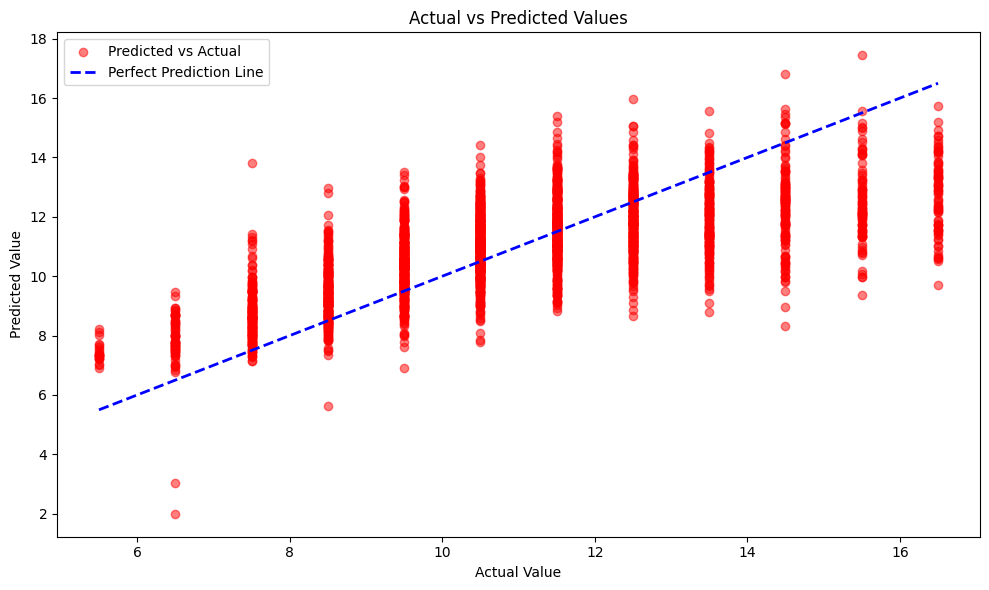

In [100]:
plot_pred(y_train, y_pred)

#### Plot the test result

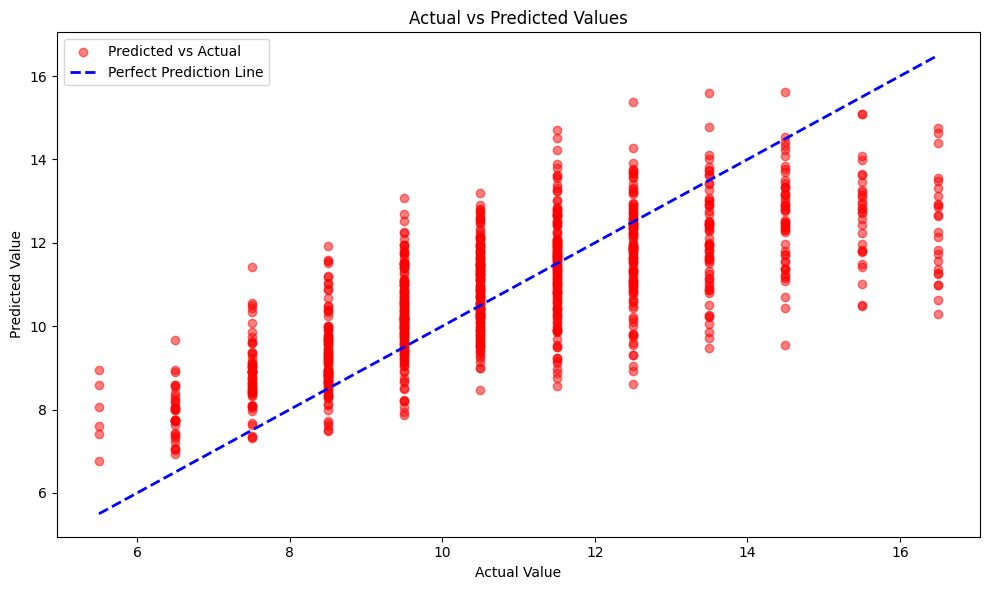

In [102]:
plot_pred(y_test, y_pred_test) 